In [49]:
import pandas as pd

data = pd.read_csv("datasets/car-sales.csv")

data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price
0,Mercedes-Benz,sedan,68,6.0,Petrol,yes,2011,S 600,300000.0
1,Mercedes-Benz,other,37,5.0,Petrol,yes,2012,G 500,300000.0
2,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S-Guard,295000.0
3,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S 600,295000.0
4,Mercedes-Benz,other,6,5.5,Petrol,yes,2016,S 63 AMG,250000.0


#### Convert categorical features into numeric

In [50]:
from sklearn import preprocessing

brandEncoder = preprocessing.LabelEncoder()
brandEncoder.fit(data["Brand"])
data["Brand"] = brandEncoder.transform(data["Brand"])

bodyEncoder = preprocessing.LabelEncoder()
bodyEncoder.fit(data["Body"])
data["Body"] = bodyEncoder.transform(data["Body"])

eTypeEncoder = preprocessing.LabelEncoder()
eTypeEncoder.fit(data["Engine Type"])
data["Engine Type"] = eTypeEncoder.transform(data["Engine Type"])

registrationEncoder = preprocessing.LabelEncoder()
registrationEncoder.fit(data["Registration"])
data["Registration"] = registrationEncoder.transform(data["Registration"])

modelEncoder = preprocessing.LabelEncoder()
modelEncoder.fit(data["Model"])
data["Model"] = modelEncoder.transform(data["Model"])

data.sample(5)



,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price
2018,6,5,230,1.9,0,1,2009,279,11800.0
2283,6,2,1,1.4,3,1,2014,218,10493.0
2159,6,5,110,1.6,0,1,2012,104,10999.0
3167,6,4,160,2.8,3,1,2001,256,6800.0
1855,5,3,203,NaN,3,1,2005,105,12800.0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4173 non-null   int32  
 1   Body          4173 non-null   int32  
 2   Mileage       4173 non-null   int64  
 3   EngineV       4025 non-null   float64
 4   Engine Type   4173 non-null   int32  
 5   Registration  4173 non-null   int32  
 6   Year          4173 non-null   int64  
 7   Model         4173 non-null   int32  
 8   Price         4173 non-null   float64
dtypes: float64(2), int32(5), int64(2)
memory usage: 212.0 KB


In [52]:
data.fillna({ "EngineV": data["EngineV"].mean() }, inplace = True)

In [53]:
data.describe()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,3.171340,2.562425,164.141625,2.762127,1.301941,0.905584,2006.365684,163.211598,19218.579430
std,2.084648,1.642627,104.763054,4.846869,1.359738,0.292442,6.685332,86.903844,24625.021129
min,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,1969.000000,0.000000,600.000000
25%,1.000000,1.000000,90.000000,1.900000,0.000000,1.000000,2003.000000,98.000000,6999.000000
50%,3.000000,3.000000,158.000000,2.200000,1.000000,1.000000,2007.000000,162.000000,11500.000000
75%,5.000000,3.000000,230.000000,3.000000,3.000000,1.000000,2012.000000,226.000000,21700.000000
max,6.000000,5.000000,980.000000,99.990000,3.000000,1.000000,2016.000000,305.000000,300000.000000


[Text(0, 0, 'Brand'),
 Text(0, 1, 'Body'),
 Text(0, 2, 'Mileage'),
 Text(0, 3, 'EngineV'),
 Text(0, 4, 'Engine Type'),
 Text(0, 5, 'Registration'),
 Text(0, 6, 'Year'),
 Text(0, 7, 'Model'),
 Text(0, 8, 'Price')]

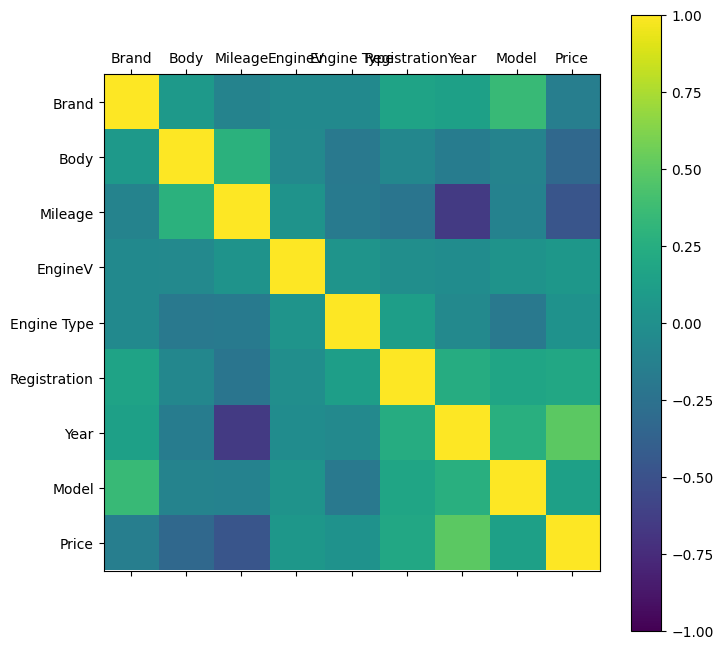

In [54]:
import matplotlib.pyplot as plt

correlations = data.corr()

figure = plt.figure(figsize = (8, 8))

axes = figure.add_subplot(1, 1, 1)

corrAxis = axes.matshow(correlations, vmin = -1, vmax = 1)

figure.colorbar(corrAxis)

ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]

axes.set_xticks(ticks)
axes.set_yticks(ticks)

axes.set_xticklabels(data.columns)
axes.set_yticklabels(data.columns)

In [55]:
x = data[["Brand", "Body", "Mileage", "Year"]]
y = data["Price"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values)

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

intercept = model.intercept_
coefficient = model.coef_

"intercept", intercept, "coefficient", coefficient

('intercept',
 -2634462.6042495226,
 'coefficient',
 array([-2363.56244181, -3022.4629282 ,   -47.47206109,  1334.17963962]))

In [57]:
y_predict = model.predict(x_test)

In [58]:
from sklearn import metrics
from math import sqrt

mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = sqrt(mse)

"mae:", mae, "rmse", rmse

('mae:', 11102.09781106434, 'rmse', 21738.83232035922)

In [59]:
sample_data = [["Toyota", "sedan", 60, 2018]]

brand = sample_data[0][0]
sample_data[0][0] = brandEncoder.transform([brand])[0]

body = sample_data[0][1]
sample_data[0][1] = bodyEncoder.transform([body])[0]

sample_data


[[5, 3, 60, 2018]]

In [60]:
model.predict(sample_data)

array([34178.38384572])

In [68]:
sample_data = [5, 3, 60, 2018]

intercept + coefficient[0] * sample_data[0] + coefficient[1] * sample_data[1] + coefficient[2] * sample_data[2] + coefficient[3] * sample_data[3]

34178.38384571625